## Visualiztion of Time Series

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score
from TSB_AD.evaluation.basic_metrics import basic_metricor

def plot_func_ts(data, label, file_name):

    grader = basic_metricor()
    range_anomaly = grader.range_convers_new(label)

    # Create the main trace
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=list(range(len(data))),
        y=data,
        mode='lines',
        line=dict(color='#0248b5', width=2),      # [#0b5920, 0248b5]
        name='Time Series'
    ))

    # Highlight anomalies
    for r in range_anomaly:
        if r[0] == r[1]:
            fig.add_trace(go.Scatter(
                x=[r[0]],
                y=[data[r[0]]],
                mode='markers',
                marker=dict(color='red', size=5),
                name='Anomaly Point'
            ))
        else:
            fig.add_trace(go.Scatter(
                x=list(range(r[0], r[1]+1)),
                y=data[r[0]:r[1]+1],
                mode='lines',
                line=dict(color='red', width=2),
                name=f'Anomaly Range {r[0]}-{r[1]}'
            ))
    fig.update_layout(title=file_name, height=300, plot_bgcolor='white', paper_bgcolor='white',     
        xaxis=dict(
        tickfont=dict(size=18),
        showline=True,
        linecolor='black',
        linewidth=2
        ))
    return fig

def plot_func_score(label, anomaly_score, file_name):
    auc_roc = roc_auc_score(label, anomaly_score)
    auc_pr = average_precision_score(label, anomaly_score)

    thresholds = np.linspace(anomaly_score.min(), anomaly_score.max(), 100)
    f1_scores = []

    for threshold in thresholds:
        predictions = (anomaly_score > threshold).astype(int)
        f1 = f1_score(label, predictions)
        f1_scores.append(f1)

    best_threshold = thresholds[np.argmax(f1_scores)]
    best_f1_score = max(f1_scores)

    predictions = (anomaly_score > best_threshold).astype(int)

    false_negatives = np.where((label == 1) & (predictions == 0))[0]
    false_positives = np.where((label == 0) & (predictions == 1))[0]
    true_positives = np.where((label == 1) & (predictions == 1))[0]

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=list(range(len(anomaly_score))),
        y=anomaly_score,
        mode='lines',
        line=dict(color='#26a9b5', width=1.5),
        name='Anomaly Score'
    ))

    fig.add_trace(go.Scatter(
        x=[0, len(anomaly_score) - 1],
        y=[best_threshold, best_threshold],
        mode='lines',
        line=dict(color='red', width=1, dash='dash'),
        name='Threshold'
    ))

    fig.add_trace(go.Scatter(
        x=false_negatives,
        y=anomaly_score[false_negatives],
        mode='markers',
        marker=dict(color='orange', size=5, symbol='x'),
        name='False Negatives'
    ))

    fig.add_trace(go.Scatter(
        x=false_positives,
        y=anomaly_score[false_positives],
        mode='markers',
        marker=dict(color='purple', size=5, symbol='circle'),
        name='False Positives'
    ))

    fig.add_trace(go.Scatter(
        x=true_positives,
        y=anomaly_score[true_positives],
        mode='markers',
        marker=dict(color='green', size=5, symbol='star'),
        name='True Positives'
    ))

    fig.update_layout(
        title=f"{file_name}<br>AUC-ROC: {auc_roc:.2f}, AUC-PR: {auc_pr:.2f}, Best F1: {best_f1_score:.2f}",
        height=300,
        xaxis=dict(
            tickfont=dict(size=18),
            title='Time',
            showline=True,
            linecolor='black',
            linewidth=2
        ),
        yaxis=dict(
            title='Anomaly Score',
            showline=True,
            linecolor='black',
            linewidth=2
        ),
        plot_bgcolor='white',
        paper_bgcolor='white'
    )

    return fig


data:  (4031,)


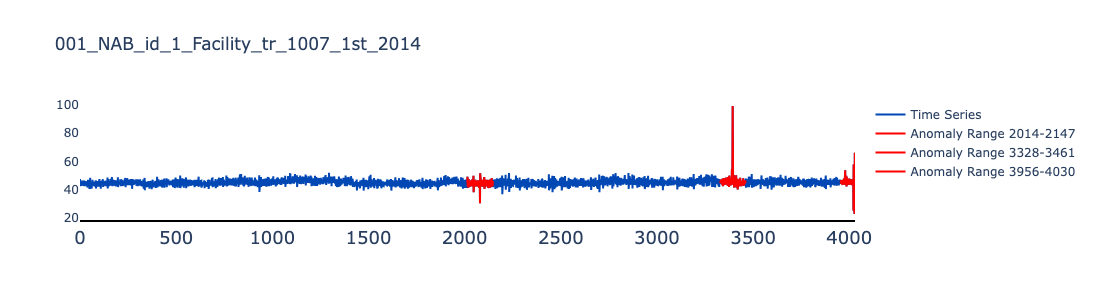

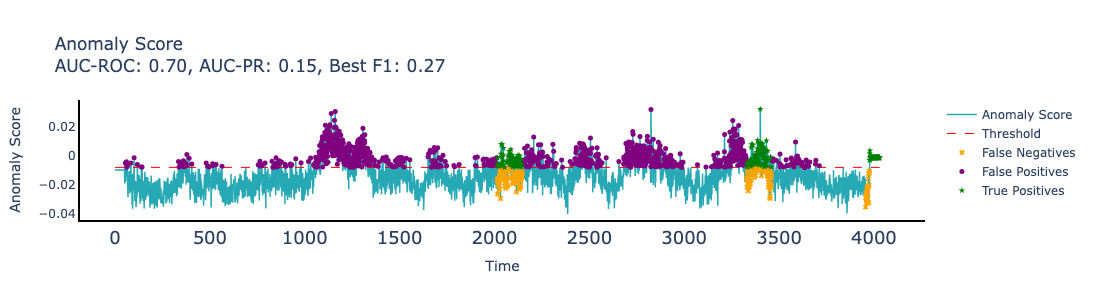

In [2]:
import numpy as np
from TSB_AD.evaluation.metrics import get_metrics
import pandas as pd

file_name = '001_NAB_id_1_Facility_tr_1007_1st_2014'
df = pd.read_csv(f'../Datasets/TSB-AD-U/{file_name}.csv').dropna()
data = df.iloc[:, 0].values.astype(float)
label = df['Label'].astype(int).to_numpy()
print('data: ', data.shape)

anomaly_score = np.load(f'/home/chenjin/redcoast/TSB-AD/output.npy')
# metrics = get_metrics(anomaly_score, label, slidingWindow=100)

fig_ts = plot_func_ts(data, label, file_name)
fig_ts.show()
fig_score = plot_func_score(label, anomaly_score, 'Anomaly Score')
fig_score.show()
# print('metrics: ', metrics)
